In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os


import plotly.express as px

%matplotlib inline

In [3]:
df = pd.read_csv('myExpenses1.csv')
df.head()

,Date,Item,Amount,Category,Time,day
0,1/3/2023,chai,7,alone,7:00,Wednesday
1,1/3/2023,chai,20,friend,10:00,Wednesday
2,1/3/2023,juice,15,friend,13:00,Wednesday
3,1/3/2023,rikshow,12,alone,14:00,Wednesday
4,1/3/2023,coffee,12,alone,15:00,Wednesday


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      145 non-null    object
 1   Item      145 non-null    object
 2   Amount    145 non-null    int64 
 3   Category  144 non-null    object
 4   Time      145 non-null    object
 5   day       145 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.9+ KB


In [5]:
df.describe()

,Amount
count,145.000000
mean,31.786207
std,56.389541
min,5.000000
25%,12.000000
50%,17.000000
75%,30.000000
max,500.000000


In [6]:
df.isnull().sum()

Date        0
Item        0
Amount      0
Category    1
Time        0
day         0
dtype: int64

In [7]:
df['Category'].fillna('alone', inplace=True)

In [8]:
# Drop rows where 'Time' is null
df = df.dropna(subset=['Time'])


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')


In [10]:
df['Hour'] = df['Date'].dt.hour
df['Amount'] = df['Amount']*10

In [11]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create the 'Time_of_Day' column
df['Time_of_Day'] = df['Hour'].apply(time_of_day)

In [12]:
print(df.columns)

Index(['Date', 'Item', 'Amount', 'Category', 'Time', 'day', 'Hour',
       'Time_of_Day'],
      dtype='object')


In [13]:
df = df.drop(columns=['Hour'])

In [14]:
df['Amount_Category'] = pd.cut(df['Amount'], bins=[0, 50, 100, float('inf')], labels=["Low", "Medium", "High"])


In [15]:
df.head()

,Date,Item,Amount,Category,Time,day,Time_of_Day,Amount_Category
0,2023-03-01,chai,70,alone,7:00,Wednesday,Night,Medium
1,2023-03-01,chai,200,friend,10:00,Wednesday,Night,High
2,2023-03-01,juice,150,friend,13:00,Wednesday,Night,High
3,2023-03-01,rikshow,120,alone,14:00,Wednesday,Night,High
4,2023-03-01,coffee,120,alone,15:00,Wednesday,Night,High


In [16]:
print(df.columns)

Index(['Date', 'Item', 'Amount', 'Category', 'Time', 'day', 'Time_of_Day',
       'Amount_Category'],
      dtype='object')


In [17]:
df = pd.get_dummies(df, columns=['Category'])


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Time_of_Day'] = le.fit_transform(df['Time_of_Day'])


In [19]:
# Function to classify expenses
def classify_expense(row):
    if row['day'] in ['Monday', 'Wednesday', 'Friday'] or row['Time_of_Day'] == 'Night':
        return 'Less Essential'
    else:
        return 'Essential'

# Apply the classification logic
df['Class'] = df.apply(classify_expense, axis=1)



In [20]:
df.head()

,Date,Item,Amount,Time,day,Time_of_Day,Amount_Category,Category_alone,Category_friend,Class
0,2023-03-01,chai,70,7:00,Wednesday,0,Medium,1,0,Less Essential
1,2023-03-01,chai,200,10:00,Wednesday,0,High,0,1,Less Essential
2,2023-03-01,juice,150,13:00,Wednesday,0,High,0,1,Less Essential
3,2023-03-01,rikshow,120,14:00,Wednesday,0,High,1,0,Less Essential
4,2023-03-01,coffee,120,15:00,Wednesday,0,High,1,0,Less Essential


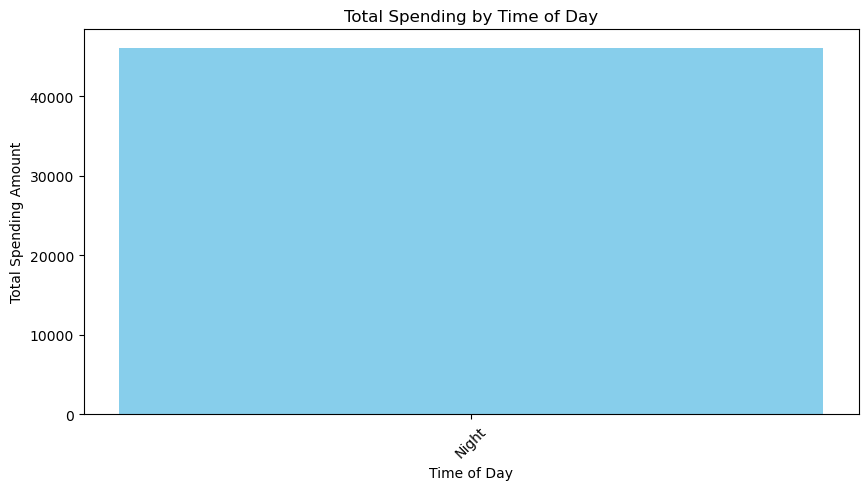

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Time_of_Day' and sum the 'Amount' spent
time_spending = df.groupby('Time_of_Day')['Amount'].sum().reset_index()

# Decode 'Time_of_Day' back to original labels (if necessary)
time_spending['Time_of_Day'] = le.inverse_transform(time_spending['Time_of_Day'])

# Sort values for better visualization
time_spending = time_spending.sort_values(by='Amount', ascending=False)

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(time_spending['Time_of_Day'], time_spending['Amount'], color='skyblue')
plt.xlabel("Time of Day")
plt.ylabel("Total Spending Amount")
plt.title("Total Spending by Time of Day")
plt.xticks(rotation=45)
plt.show()
